<a href="https://colab.research.google.com/github/ajayyadav05/Data/blob/master/Classification_Market_Data_MaxMax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC  
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV  
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from xgboost import XGBClassifier
from pprint import pprint
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 


Using TensorFlow backend.


In [0]:
url = 'https://raw.githubusercontent.com/ajayyadav05/Data/master/Data_Extract_14_March_Status.csv'
train_df8 = pd.read_csv(url)


importing the data

In [0]:
url = 'https://raw.githubusercontent.com/ajayyadav05/Data/master/Data_Extract_06_March_Status.csv'
#url = 'https://raw.githubusercontent.com/ajayyadav05/Data/master/Data_Extract_05_March_Status_PZ.csv'
#'https://raw.githubusercontent.com/ajayyadav05/Data/master/Data_Extract_05_March_Status.csv'
#'https://raw.githubusercontent.com/ajayyadav05/Data/master/datawith_2_1_0_1_2.csv'
#'https://raw.githubusercontent.com/ajayyadav05/Data/master/datawith_2_1_point_5_0_point5_1_2.csv'
#'https://raw.githubusercontent.com/ajayyadav05/Data/master/datawith_1_5%20and%20Point_5.csv'
train_df3 = pd.read_csv(url)


#Code to Test on a limited Dataset
Filter = ["20190199","201812392"]

#Filter = ["20181203", #,"20181204","20181205","20181206","20181207","20181210","20181211",
         #"20181212","20181213","20181214","20181217","20181218","20181219","20181220",
        # "20181221","20181224","20181226","20181227","20181228","20181231","20181232",
#"20181232",] #,'20181226','20181227'
 #,'20181226','20181227'
#train_df1 = train_df3[train_df3.Date.isin(Filter)]
train_df1 = train_df3[~train_df3.Date.isin(Filter)]
train_df = train_df1



#train_df3.loc[(train_df3['Name'] == 'Test_Name'),'Date' ]  = 19000101
#train_df.loc[(train_df['Name'] == 'Test_Name')] 

#train_df.loc[(train_df['Name'] == 'Test_Name') & (train_df['Date'] == 20180101) , 'Date'] = 19000101
#train_df3.loc[(train_df3['Name'] == 'Test_Name'),'Date' ]  = 19000101
#train_df3.loc[(train_df3['Name'] == 'Test_Name')] 


In [0]:
#Making the target variable binary 
#train_df['N-1_Close_Minus_N_09:00_To_13:45_Max_Binary'] = np.where(train_df['N-1_Close_Minus_N_09:00_To_13:45_Max'] == 'P', 1, 
    #                   np.where(train_df['N-1_Close_Minus_N_09:00_To_13:45_Max']  == 'Z', 0, 0))
#train_df['N-1_Close_Minus_N_09:00_To_15:00_Min_Binary'] = np.where(train_df['N-1_Close_Minus_N_09:00_To_15:00_Min'] == 'NN', 1, 
                 #     np.where(train_df['N-1_Close_Minus_N_09:00_To_15:00_Min']  == 'N', 1, 0))
#train_df['10:08_TO_13:45_MAX_MINUS_10:08_OPEN_Binary'] = np.where(train_df['10:08_TO_13:45_MAX_MINUS_10:08_OPEN'] == 'P', 1,  
#                       np.where(train_df['10:08_TO_13:45_MAX_MINUS_10:08_OPEN']  == 'Z', 0, 0))
#train_df['10:08_TO_13:45_MIN_MINUS_10:08_OPEN_Binary'] = np.where(train_df['10:08_TO_13:45_MIN_MINUS_10:08_OPEN'] == 'N', 1,  
#                       np.where(train_df['10:08_TO_13:45_MIN_MINUS_10:08_OPEN']  == 'Z', 0, 0))

In [0]:
columns_to_keep=    [
 'N-1_09:00_To_09:30_MAX_MINUS_09:00_OPEN',
 'N-1_09:00_To_09:30_MIN_MINUS_09:00_OPEN',
 'N-1_09:30_To_10:00_MAX_MINUS_09:30_OPEN',
 'N-1_09:30_To_10:00_MIN_MINUS_09:30_OPEN',
 'N-1_10:00_To_10:30_MAX_MINUS_10:00_OPEN',
 'N-1_10:00_To_10:30_MIN_MINUS_10:00_OPEN',
 'N-1_10:30_To_11:00_MAX_MINUS_10:30_OPEN',
 'N-1_10:30_To_11:00_MIN_MINUS_10:30_OPEN',
 'N-1_11:00_To_11:30_MAX_MINUS_11:00_OPEN',
 'N-1_11:00_To_11:30_MIN_MINUS_11:00_OPEN',
 'N-1_11:30_To_12:00_MAX_MINUS_11:30_OPEN',
 'N-1_11:30_To_12:00_MIN_MINUS_11:30_OPEN',
 'N-1_12:00_To_12:30_MAX_MINUS_12:00_OPEN',
 'N-1_12:00_To_12:30_MIN_MINUS_12:00_OPEN',
 'N-1_12:30_To_13:00_MAX_MINUS_12:30_OPEN',
 'N-1_12:30_To_13:00_MIN_MINUS_12:30_OPEN',
 'N-1_13:00_To_13:30_MAX_MINUS_13:00_OPEN',
 'N-1_13:00_To_13:30_MIN_MINUS_13:00_OPEN',
 'N-1_13:30_To_14:00_MAX_MINUS_13:30_OPEN',
 'N-1_13:30_To_14:00_MIN_MINUS_13:30_OPEN',
 'N-1_14:00_To_14:30_MAX_MINUS_14:00_OPEN',
 'N-1_14:00_To_14:30_MIN_MINUS_14:00_OPEN',
 'N-1_14:30_To_15:00_MAX_MINUS_14:30_OPEN',
 'N-1_14:30_To_15:00_MIN_MINUS_14:30_OPEN',
 'N-1_15:00_To_15:30_MAX_MINUS_15:00_OPEN',
 'N-1_15:00_To_15:30_MIN_MINUS_15:00_OPEN',
 'N-2_09:00_To_09:30_MAX_MINUS_09:00_OPEN',
 'N-2_09:00_To_09:30_MIN_MINUS_09:00_OPEN',
 'N-2_09:30_To_10:00_MAX_MINUS_09:30_OPEN',
 'N-2_09:30_To_10:00_MIN_MINUS_09:30_OPEN',
 'N-2_10:00_To_10:30_MAX_MINUS_10:00_OPEN',
 'N-2_10:00_To_10:30_MIN_MINUS_10:00_OPEN',
 'N-2_10:30_To_11:00_MAX_MINUS_10:30_OPEN',
 'N-2_10:30_To_11:00_MIN_MINUS_10:30_OPEN',
 'N-2_11:00_To_11:30_MAX_MINUS_11:00_OPEN',
 'N-2_11:00_To_11:30_MIN_MINUS_11:00_OPEN',
 'N-2_11:30_To_12:00_MAX_MINUS_11:30_OPEN',
 'N-2_11:30_To_12:00_MIN_MINUS_11:30_OPEN',
 'N-2_12:00_To_12:30_MAX_MINUS_12:00_OPEN',
 'N-2_12:00_To_12:30_MIN_MINUS_12:00_OPEN',
 'N-2_12:30_To_13:00_MAX_MINUS_12:30_OPEN',
 'N-2_12:30_To_13:00_MIN_MINUS_12:30_OPEN',
 'N-2_13:00_To_13:30_MAX_MINUS_13:00_OPEN',
 'N-2_13:00_To_13:30_MIN_MINUS_13:00_OPEN',
 'N-2_13:30_To_14:00_MAX_MINUS_13:30_OPEN',
 'N-2_13:30_To_14:00_MIN_MINUS_13:30_OPEN',
 'N-2_14:00_To_14:30_MAX_MINUS_14:00_OPEN',
 'N-2_14:00_To_14:30_MIN_MINUS_14:00_OPEN',
 'N-2_14:30_To_15:00_MAX_MINUS_14:30_OPEN',
 'N-2_14:30_To_15:00_MIN_MINUS_14:30_OPEN',
 'N-2_15:00_To_15:30_MAX_MINUS_15:00_OPEN',
 'N-2_15:00_To_15:30_MIN_MINUS_15:00_OPEN',
 'N-2_09:30_Open_Minus_N-2_EOD_Close',
 'N-2_15:30_To_EOD_MAX_MINUS_N-1_09:00_OPEN',
 'N-2_15:30_To_EOD_MIN_MINUS_N-1_09:00_OPEN',
 'N-1_09:30_Open_Minus_N-1_EOD_Close',
 'N-1_09:00_To_09:30_Max_Minus_N-2_09:00_Open',
 'N-1_09:00_To_09:30_Min_Minus_N-2_09:00_Open',
 'N-1_EOD_Close_Minus_N-1_09:00_Open' ,
 'N-2_EOD_Close_Minus_N-2_09:00_Open',

  ]

In [0]:
X_data1 = train_df[columns_to_keep] 
y_data =   train_df['N_DAY_MAX_GRT_N-1_DAY_MAX'] #  train_df['13_47_Open']

indices = train_df.index.values 

In [7]:
y_data.sum()

20964

In [8]:
#scaler = StandardScaler().fit(X_data1) 
#rescaledX = scaler.transform(X_data1) 


X_data =  pd.get_dummies(X_data1)#

#so that 30% will be selected for testing data randomly
#Using Indices Train test
X_train, X_test,indices_train,indices_test = train_test_split(X_data,indices, test_size=0.25, random_state=42)
y_train, y_test = y_data[indices_train],  y_data[indices_test]

#Simple Train Test
#X_train, X_test,y_train , y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42) 



print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (33016, 244)
Training Labels Shape: (33016,)
Testing Features Shape: (11006, 244)
Testing Labels Shape: (11006,)


In [0]:
  
 # for feat, importance, rank in zip(X_data1.columns, rfe.support_, rfe.ranking_):
        #print(feat)
      #  print('feature: {f}, importance: {i}, importance: {r}'.format(f=feat, i=importance, r=rank))
    
   

In [9]:
# Instantiate model with 1000 decision trees
 # rf = RandomForestClassifier(n_estimators = 2000, random_state = 42,class_weight='balanced')
rf = XGBClassifier(max_depth=5, n_estimators=2000, learning_rate=0.04,class_weight='balanced') 

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

#[[2559 1209]
# [1827 1875]]

#rf Balanced
#[[5366  398]
 #[1484  219]]
  # with n-1close column
  
#[[3077 1549] with gbm , 66,72 for 1
 #[1192 3053]]

[[3911 1909]
 [1528 3658]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      5820
           1       0.66      0.71      0.68      5186

   micro avg       0.69      0.69      0.69     11006
   macro avg       0.69      0.69      0.69     11006
weighted avg       0.69      0.69      0.69     11006

0.6877157913865164


In [0]:
# to check the confusion matrix for multiple thresholds

def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

In [0]:
y_scores = rf.predict_proba(X_test)[:, 1]
# for classifiers with decision_function, this achieves similar results
# y_scores = classifier.decision_function(X_test)

#p, r, thresholds = precision_recall_curve(y_test, y_scores)
p, r, thresholds = precision_recall_curve(y_test, y_pred)

 #pred_neg  pred_pos .80
 #pred_neg  pred_pos
#neg      4386       168
#pos      3639       677


     pred_neg  pred_pos
neg      5711       109
pos      4668       518


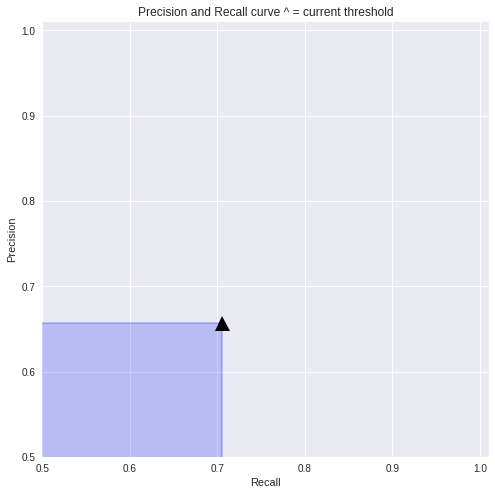

In [12]:
precision_recall_threshold(p, r, thresholds, 0.85)

In [0]:
#rf.get_booster()

#for feat, importance in zip(X_train.columns, rf.feature_importances_):
        #print(feat)
      #  print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    
   
 


y_data sum is : 84
Training Features Shape: (0, 244)
Training Labels Shape: (0,)
Testing Features Shape: (89, 244)
Testing Labels Shape: (89,)
     pred_neg  pred_pos
neg         5         0
pos        82         2


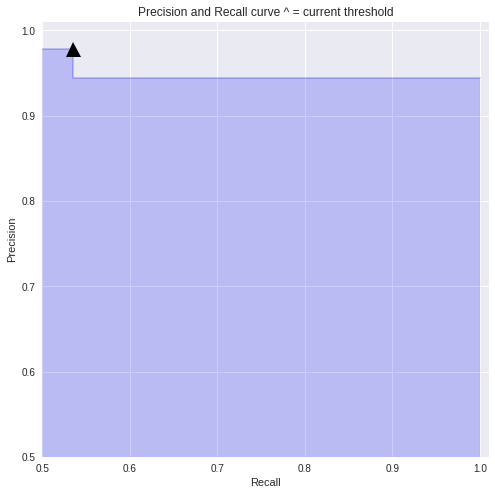

In [23]:
Filter = ["19000101","20190315"]

#Filter = [
#  "20190131","20190130","20190129","20190128","20190125","20190124","20190123","20190122","20190121",
#"20190118","20190117","20190116","20190115","20190114","20190111","20190110","20190109",
#"20190108","20190107","20190104","20190103","20190102",
  
#] 
#train_df1 = train_df3[train_df3.Date.isin(Filter)]
#
#train_df = train_df1

train_df9 = train_df8[train_df8.Date.isin(Filter)] # live
train_df = train_df9


X_data1 = train_df[columns_to_keep] 
y_data =   train_df['N_DAY_MAX_GRT_N-1_DAY_MAX'] #  train_df['13_47_Open']

indices = train_df.index.values 
print("y_data sum is :",y_data.sum() )

#mapper = DataFrameMapper([(X_data1.columns, StandardScaler())])
#scaled_features = mapper.fit_transform(X_data1.copy(), 4)
#scaled_features_df = pd.DataFrame(scaled_features, index=X_data1.index, columns=X_data1.columns)


X_data = pd.get_dummies(X_data1)#scaled_features_df #pd.get_dummies(X_data1)

#so that 30% will be selected for testing data randomly
#Using Indices Train test
X_train, X_test,indices_train,indices_test = train_test_split(X_data,indices, test_size=0.99, random_state=42)
y_train, y_test = y_data[indices_train],  y_data[indices_test]

#Simple Train Test
#X_train, X_test,y_train , y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42) 


#print('Training Features Shape:', X_data.shape)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

y_pred = rf.predict(X_test)
y_scores = rf.predict_proba(X_test)[:, 1]
p, r, thresholds = precision_recall_curve(y_test, y_pred)

precision_recall_threshold(p, r, thresholds, 0.85)

In [25]:
#df_new.loc[indices_test,'pred_test'] = prediction_of_probability # clf.predict_proba(X_test)
#print(df_new.head(10))
prediction_of_probability = rf.predict_proba(X_test)
df_new = train_df.copy()

df_new['Target'] = pd.Series(y_test,index=X_test.index) # y_test
df_new['prob_of_Zero'] = pd.Series(prediction_of_probability[:,0],index=X_test.index) #prediction_of_probability[:,0] 
df_new['prob_of_P_N'] = pd.Series(prediction_of_probability[:,1],index=X_test.index) #prediction_of_probability[:,1] 
df_new['prediction result'] = pd.Series(y_pred,index=X_test.index)
df_new[df_new['prob_of_P_N'] > .75000]
#df_new[df_new.prob_of_P_N.between(.6,.7)]
#df_new[df_new['Name'] == "TITAN"]


,Name,Date,N_DAY_MAX_GRT_N-1_DAY_MAX,N_DAY_MIN_LT_N-1_DAY_MIN,N_09:00_To_09:30_Max_Minus_09:00_Open,N_09:00_To_09:30_Min_Minus_09:00_Open,N_09:00_To_13:45_Max_Minus_09:00_Open,N_09:00_To_13:45_Max_Minus_N-1_Close,N_09:00_To_13:45_Min_Minus_09:00_Open,N_09:00_To_13:45_Min_Minus_N-1_Close,...,N-2_14:30_To_15:00_MIN_MINUS_14:30_OPEN,N-2_15:00_To_15:30_MAX_MINUS_15:00_OPEN,N-2_15:00_To_15:30_MIN_MINUS_15:00_OPEN,N-2_15:30_To_EOD_MAX_MINUS_N-1_09:00_OPEN,N-2_15:30_To_EOD_MIN_MINUS_N-1_09:00_OPEN,N-2_EOD_Close_Minus_N-2_09:00_Open,Target,prob_of_Zero,prob_of_P_N,prediction result
5,ADANIPORTS,20190315,1,1,Z,Z,Z,Z,Z,NN,...,NZ,P,Z,Z,NZ,P,1,0.243574,0.756426,1
29,BHARTIARTL,20190315,1,1,Z,Z,Z,Z,Z,NN,...,NZ,PZ,NZ,Z,NZ,NN,1,0.152428,0.847572,1
37,CENTURYTEX,20190315,1,1,Z,Z,Z,Z,Z,NN,...,Z,PZ,NZ,Z,Z,N,1,0.220031,0.779969,1
41,COALINDIA,20190315,1,1,Z,Z,Z,Z,Z,NN,...,Z,PZ,NZ,Z,NZ,N,1,0.231410,0.768590,1
47,DRREDDY,20190315,1,1,Z,Z,Z,Z,Z,NN,...,NZ,PZ,NZ,Z,Z,Z,1,0.207015,0.792985,1
79,INDUSINDBK,20190315,1,1,Z,Z,Z,Z,Z,NN,...,NZ,PZ,Z,Z,NZ,PP,1,0.228615,0.771385,1
107,NTPC,20190315,1,1,Z,Z,Z,Z,Z,NN,...,Z,PZ,N,Z,NZ,N,1,0.112924,0.887076,1
132,SUNPHARMA,20190315,1,1,Z,Z,Z,Z,Z,NN,...,N,PZ,NN,Z,NZ,NN,1,0.138541,0.861459,1
164,WOCKPHARMA,20190315,1,1,Z,Z,Z,Z,Z,NN,...,NN,PZ,NZ,Z,NZ,NN,1,0.207501,0.792499,1


In [0]:
def getting_output_max_max(current_dt, cutoff = .80):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    Filter = ["19000101", current_dt]

    train_df1 = train_df3[train_df3.Date.isin(Filter)]
   # train_df1 = train_df8[train_df8.Date.isin(Filter)] #live
    train_df = train_df1


    X_data1 = train_df[columns_to_keep] 
    y_data =   train_df['N_DAY_MAX_GRT_N-1_DAY_MAX'] #  train_df['13_47_Open']
    
    indices = train_df.index.values 
    #print("y_data sum is :",y_data.sum() )


    X_data = pd.get_dummies(X_data1)#scaled_features_df #pd.get_dummies(X_data1)

    #so that 30% will be selected for testing data randomly
    #Using Indices Train test
    X_train, X_test,indices_train,indices_test = train_test_split(X_data,indices, test_size=0.99, random_state=42)
    y_train, y_test = y_data[indices_train],  y_data[indices_test]
    y_scores = rf.predict_proba(X_test)[:, 1]
    y_pred = (y_scores > cutoff)
    print("Matrix at cut off :", cutoff, "on date: ", current_dt )
    print(confusion_matrix(y_test,y_pred)) 
    


In [16]:
DateFilter = [
   "20190226",
"20190225",
"20190222",
"20190221",
"20190220",
"20190219",
"20190218",
"20190215",
"20190214",
"20190213",
"20190212",
"20190211",
"20190208",
"20190207",
"20190206",
"20190205",
"20190204",
"20190201","20190131","20190130","20190129","20190128","20190125","20190124","20190123","20190122","20190121",
"20190118","20190117","20190116","20190115","20190114","20190111","20190110","20190109",
"20190108","20190107","20190104","20190103","20190102"
   


]
for x in DateFilter:
  getting_output_max_max(x, .750)

Matrix at cut off : 0.75 on date:  20190226
[[46  4]
 [20 22]]
Matrix at cut off : 0.75 on date:  20190225
[[34  0]
 [30 27]]
Matrix at cut off : 0.75 on date:  20190222
[[34  0]
 [26 30]]
Matrix at cut off : 0.75 on date:  20190221
[[19  1]
 [28 42]]
Matrix at cut off : 0.75 on date:  20190220
[[38  2]
 [37 12]]
Matrix at cut off : 0.75 on date:  20190219
[[43  1]
 [38  9]]
Matrix at cut off : 0.75 on date:  20190218
[[59  2]
 [15 15]]
Matrix at cut off : 0.75 on date:  20190215
[[59  3]
 [13 13]]
Matrix at cut off : 0.75 on date:  20190214
[[54  1]
 [23  8]]
Matrix at cut off : 0.75 on date:  20190213
[[58  1]
 [15 15]]
Matrix at cut off : 0.75 on date:  20190212
[[51  1]
 [18 19]]
Matrix at cut off : 0.75 on date:  20190211
[[78  0]
 [ 6  5]]
Matrix at cut off : 0.75 on date:  20190208
[[60  4]
 [17  9]]
Matrix at cut off : 0.75 on date:  20190207
[[22  2]
 [26 40]]
Matrix at cut off : 0.75 on date:  20190206
[[43  0]
 [30 15]]
Matrix at cut off : 0.75 on date:  20190205
[[58  0]
 [